# 📈 Notebook 4: Evaluation & Visualization
Evaluate sentiment models using accuracy, confusion matrix, and informative features.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load model and vectorizer
model = joblib.load('../models/logistic_regression.joblib')
vectorizer = joblib.load('../models/vectorizer.joblib')

In [2]:
df = pd.read_csv('../data/processed/cleaned_reviews.csv')
X = df['clean_review']
y = df['sentiment']

X_vec = vectorizer.transform(X)
y_pred = model.predict(X_vec)

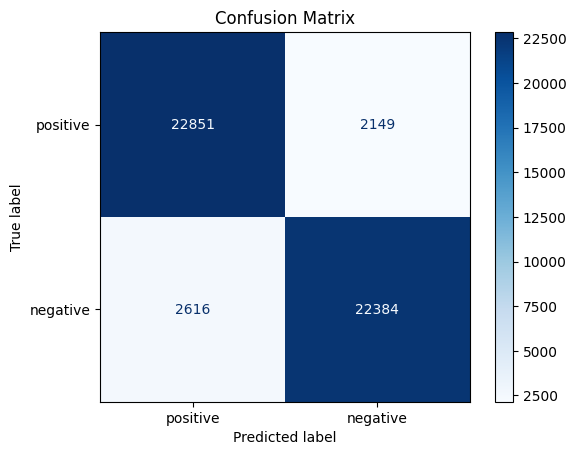

In [3]:
cm = confusion_matrix(y, y_pred, labels=['positive', 'negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'negative'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [4]:
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

top_positive_idx = coefs.argsort()[-20:][::-1]
top_negative_idx = coefs.argsort()[:20]

top_pos_words = [(feature_names[i], coefs[i]) for i in top_positive_idx]
top_neg_words = [(feature_names[i], coefs[i]) for i in top_negative_idx]

print("Top Positive Words:")
for word, coef in top_pos_words:
    print(f"{word}: {coef:.4f}")

print("\nTop Negative Words:")
for word, coef in top_neg_words:
    print(f"{word}: {coef:.4f}")

Top Positive Words:
great: 6.9043
excellent: 6.5700
perfect: 5.1499
best: 4.8943
wonderful: 4.7958
amazing: 4.6969
favorite: 4.5301
brilliant: 4.4180
loved: 4.3029
hilarious: 4.1022
enjoyed: 4.0551
today: 3.9169
fantastic: 3.8616
highly: 3.8452
superb: 3.8043
enjoyable: 3.7672
definitely: 3.6724
entertaining: 3.6642
perfectly: 3.6118
refreshing: 3.5095

Top Negative Words:
worst: -10.1941
waste: -7.8969
bad: -7.3487
awful: -7.3312
boring: -6.5426
poor: -5.8736
terrible: -5.7687
nothing: -5.5164
dull: -5.0767
poorly: -5.0375
worse: -4.8672
disappointing: -4.8306
horrible: -4.8200
fails: -4.7419
disappointment: -4.4965
supposed: -4.3367
lame: -4.2586
unfortunately: -4.1986
annoying: -4.1929
wasted: -3.9837
